In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.1.7.dev0


In [3]:
ndim = 15

In [4]:
import time

import emcee
import numpy as np

import pymc3 as pm
from pymc3.step_methods.hmc import quadpotential as quad

In [5]:
np.random.seed(41)

with pm.Model() as model:
    pm.Normal("x", shape=ndim)
    
    potential = quad.QuadPotentialDiag(np.ones(ndim))
    
    step_kwargs = dict()
    step_kwargs["model"] = model
    step_kwargs["step_scale"] = 1.0 * model.ndim ** 0.25
    step_kwargs["adapt_step_size"] = False
    step = pm.NUTS(potential=potential, **step_kwargs)

    start = time.time()
    trace = pm.sample(tune=0, draws=10000, step=step, cores=1)
    time_pymc3 = time.time() - start

Sequential sampling (2 chains in 1 job)


NUTS: [x]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<1:03:24,  2.63it/s]

  2%|▏         | 173/10000 [00:00<43:39,  3.75it/s]

  3%|▎         | 345/10000 [00:00<30:03,  5.35it/s]

  5%|▌         | 521/10000 [00:00<20:40,  7.64it/s]

  7%|▋         | 699/10000 [00:00<14:13, 10.89it/s]

  9%|▊         | 867/10000 [00:00<09:48, 15.52it/s]

 10%|█         | 1040/10000 [00:00<06:45, 22.08it/s]

 12%|█▏        | 1213/10000 [00:01<04:40, 31.38it/s]

 14%|█▍        | 1385/10000 [00:01<03:13, 44.48it/s]

 16%|█▌        | 1560/10000 [00:01<02:14, 62.85it/s]

 17%|█▋        | 1729/10000 [00:01<01:33, 88.37it/s]

 19%|█▉        | 1904/10000 [00:01<01:05, 123.56it/s]

 21%|██        | 2076/10000 [00:01<00:46, 171.24it/s]

 22%|██▏       | 2246/10000 [00:01<00:33, 234.49it/s]

 24%|██▍       | 2419/10000 [00:01<00:23, 316.54it/s]

 26%|██▌       | 2590/10000 [00:01<00:17, 418.01it/s]

 28%|██▊       | 2762/10000 [00:01<00:13, 540.74it/s]

 29%|██▉       | 2935/10000 [00:02<00:10, 680.87it/s]

 31%|███       | 3107/10000 [00:02<00:08, 830.86it/s]

 33%|███▎      | 3281/10000 [00:02<00:06, 984.93it/s]

 35%|███▍      | 3453/10000 [00:02<00:05, 1126.57it/s]

 36%|███▋      | 3626/10000 [00:02<00:05, 1258.07it/s]

 38%|███▊      | 3801/10000 [00:02<00:04, 1372.18it/s]

 40%|███▉      | 3974/10000 [00:02<00:04, 1462.51it/s]

 41%|████▏     | 4149/10000 [00:02<00:03, 1536.35it/s]

 43%|████▎     | 4322/10000 [00:02<00:03, 1576.68it/s]

 45%|████▍     | 4494/10000 [00:02<00:03, 1610.21it/s]

 47%|████▋     | 4665/10000 [00:03<00:03, 1621.68it/s]

 48%|████▊     | 4843/10000 [00:03<00:03, 1664.57it/s]

 50%|█████     | 5023/10000 [00:03<00:02, 1701.29it/s]

 52%|█████▏    | 5199/10000 [00:03<00:02, 1715.90it/s]

 54%|█████▍    | 5379/10000 [00:03<00:02, 1739.68it/s]

 56%|█████▌    | 5558/10000 [00:03<00:02, 1751.03it/s]

 57%|█████▋    | 5735/10000 [00:03<00:02, 1751.31it/s]

 59%|█████▉    | 5912/10000 [00:03<00:02, 1743.74it/s]

 61%|██████    | 6088/10000 [00:03<00:02, 1714.15it/s]

 63%|██████▎   | 6261/10000 [00:04<00:02, 1713.23it/s]

 64%|██████▍   | 6435/10000 [00:04<00:02, 1720.95it/s]

 66%|██████▌   | 6611/10000 [00:04<00:01, 1730.33it/s]

 68%|██████▊   | 6786/10000 [00:04<00:01, 1736.06it/s]

 70%|██████▉   | 6961/10000 [00:04<00:01, 1738.70it/s]

 71%|███████▏  | 7135/10000 [00:04<00:01, 1698.99it/s]

 73%|███████▎  | 7306/10000 [00:04<00:01, 1701.61it/s]

 75%|███████▍  | 7477/10000 [00:04<00:01, 1639.43it/s]

 76%|███████▋  | 7642/10000 [00:04<00:01, 1640.06it/s]

 78%|███████▊  | 7807/10000 [00:04<00:01, 1641.69it/s]

 80%|███████▉  | 7972/10000 [00:05<00:01, 1635.35it/s]

 81%|████████▏ | 8136/10000 [00:05<00:01, 1631.90it/s]

 83%|████████▎ | 8309/10000 [00:05<00:01, 1657.44it/s]

 85%|████████▍ | 8481/10000 [00:05<00:00, 1672.94it/s]

 86%|████████▋ | 8649/10000 [00:05<00:00, 1660.16it/s]

 88%|████████▊ | 8820/10000 [00:05<00:00, 1673.19it/s]

 90%|████████▉ | 8994/10000 [00:05<00:00, 1691.50it/s]

 92%|█████████▏| 9165/10000 [00:05<00:00, 1694.69it/s]

 93%|█████████▎| 9335/10000 [00:05<00:00, 1656.18it/s]

 95%|█████████▌| 9505/10000 [00:05<00:00, 1666.17it/s]

 97%|█████████▋| 9678/10000 [00:06<00:00, 1684.80it/s]

 98%|█████████▊| 9850/10000 [00:06<00:00, 1693.95it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1601.57it/s]


  0%|          | 0/10000 [00:00<?, ?it/s]

  2%|▏         | 158/10000 [00:00<00:06, 1572.20it/s]

  3%|▎         | 335/10000 [00:00<00:05, 1625.82it/s]

  5%|▌         | 512/10000 [00:00<00:05, 1665.83it/s]

  7%|▋         | 689/10000 [00:00<00:05, 1695.41it/s]

  9%|▊         | 867/10000 [00:00<00:05, 1718.24it/s]

 10%|█         | 1035/10000 [00:00<00:05, 1704.88it/s]

 12%|█▏        | 1208/10000 [00:00<00:05, 1710.03it/s]

 14%|█▍        | 1387/10000 [00:00<00:04, 1730.81it/s]

 16%|█▌        | 1563/10000 [00:00<00:04, 1737.23it/s]

 17%|█▋        | 1735/10000 [00:01<00:04, 1731.59it/s]

 19%|█▉        | 1904/10000 [00:01<00:04, 1702.76it/s]

 21%|██        | 2074/10000 [00:01<00:04, 1699.40it/s]

 22%|██▏       | 2243/10000 [00:01<00:04, 1695.34it/s]

 24%|██▍       | 2416/10000 [00:01<00:04, 1705.55it/s]

 26%|██▌       | 2588/10000 [00:01<00:04, 1707.88it/s]

 28%|██▊       | 2759/10000 [00:01<00:04, 1684.59it/s]

 29%|██▉       | 2934/10000 [00:01<00:04, 1702.66it/s]

 31%|███       | 3110/10000 [00:01<00:04, 1718.97it/s]

 33%|███▎      | 3284/10000 [00:01<00:03, 1724.57it/s]

 35%|███▍      | 3460/10000 [00:02<00:03, 1733.56it/s]

 36%|███▋      | 3634/10000 [00:02<00:03, 1707.55it/s]

 38%|███▊      | 3806/10000 [00:02<00:03, 1708.68it/s]

 40%|███▉      | 3978/10000 [00:02<00:03, 1709.48it/s]

 41%|████▏     | 4149/10000 [00:02<00:03, 1681.14it/s]

 43%|████▎     | 4322/10000 [00:02<00:03, 1694.84it/s]

 45%|████▍     | 4497/10000 [00:02<00:03, 1708.91it/s]

 47%|████▋     | 4672/10000 [00:02<00:03, 1718.63it/s]

 48%|████▊     | 4848/10000 [00:02<00:02, 1729.26it/s]

 50%|█████     | 5022/10000 [00:02<00:03, 1613.39it/s]

 52%|█████▏    | 5199/10000 [00:03<00:02, 1655.36it/s]

 54%|█████▎    | 5371/10000 [00:03<00:02, 1673.33it/s]

 55%|█████▌    | 5547/10000 [00:03<00:02, 1696.59it/s]

 57%|█████▋    | 5723/10000 [00:03<00:02, 1713.12it/s]

 59%|█████▉    | 5898/10000 [00:03<00:02, 1723.05it/s]

 61%|██████    | 6071/10000 [00:03<00:02, 1709.02it/s]

 62%|██████▏   | 6243/10000 [00:03<00:02, 1703.52it/s]

 64%|██████▍   | 6414/10000 [00:03<00:02, 1692.66it/s]

 66%|██████▌   | 6587/10000 [00:03<00:02, 1701.98it/s]

 68%|██████▊   | 6760/10000 [00:03<00:01, 1708.31it/s]

 69%|██████▉   | 6934/10000 [00:04<00:01, 1717.39it/s]

 71%|███████   | 7106/10000 [00:04<00:01, 1706.16it/s]

 73%|███████▎  | 7281/10000 [00:04<00:01, 1718.45it/s]

 75%|███████▍  | 7459/10000 [00:04<00:01, 1735.23it/s]

 76%|███████▋  | 7634/10000 [00:04<00:01, 1737.37it/s]

 78%|███████▊  | 7809/10000 [00:04<00:01, 1741.06it/s]

 80%|███████▉  | 7984/10000 [00:04<00:01, 1729.91it/s]

 82%|████████▏ | 8158/10000 [00:04<00:01, 1725.40it/s]

 83%|████████▎ | 8331/10000 [00:04<00:00, 1713.34it/s]

 85%|████████▌ | 8506/10000 [00:04<00:00, 1720.38it/s]

 87%|████████▋ | 8679/10000 [00:05<00:00, 1718.46it/s]

 89%|████████▊ | 8851/10000 [00:05<00:00, 1714.16it/s]

 90%|█████████ | 9025/10000 [00:05<00:00, 1717.60it/s]

 92%|█████████▏| 9199/10000 [00:05<00:00, 1722.65it/s]

 94%|█████████▎| 9372/10000 [00:05<00:00, 1699.85it/s]

 95%|█████████▌| 9544/10000 [00:05<00:00, 1704.34it/s]

 97%|█████████▋| 9715/10000 [00:05<00:00, 1698.99it/s]

 99%|█████████▉| 9893/10000 [00:05<00:00, 1719.32it/s]

100%|██████████| 10000/10000 [00:05<00:00, 1710.26it/s]

The acceptance probability does not match the target. It is 0.7000475965558693, but should be close to 0.8. Try to increase the number of tuning steps.


The acceptance probability does not match the target. It is 0.6982303140324398, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
samples_pymc3 = np.array(trace.get_values("x", combine=False))
samples_pymc3 = np.moveaxis(samples_pymc3, 0, 1)
tau_pymc3 = emcee.autocorr.integrated_time(samples_pymc3)
neff_pymc3 = np.prod(samples_pymc3.shape[:2]) / tau_pymc3
teff_pymc3 = time_pymc3 / neff_pymc3
teff_pymc3

array([0.00038464, 0.00037072, 0.00039665, 0.00040611, 0.00039678,
       0.0003826 , 0.00040552, 0.00039963, 0.00038832, 0.00036846,
       0.00039565, 0.0004131 , 0.00036529, 0.00036423, 0.00038131])

In [7]:
np.random.seed(1234)

import exoplanet as xo

with model:
    func = xo.get_theano_function_for_var(model.logpt)
    
    def logprob(theta):
        point = model.bijection.rmap(theta)
        args = xo.get_args_for_theano_function(point)
        return func(*args)
    
    x0 = np.random.randn(ndim)
    nwalkers = 36
    x0 = np.random.randn(nwalkers, ndim)
    
    emcee_sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob)
    state = emcee_sampler.run_mcmc(x0, 2000, progress=True)
    emcee_sampler.reset()
    strt = time.time()
    emcee_sampler.run_mcmc(state, 20000, progress=True)
    time_emcee = time.time() - strt

  0%|          | 0/2000 [00:00<?, ?it/s]

  3%|▎         | 52/2000 [00:00<00:03, 513.64it/s]

  5%|▌         | 105/2000 [00:00<00:03, 516.95it/s]

  8%|▊         | 158/2000 [00:00<00:03, 519.33it/s]

 11%|█         | 211/2000 [00:00<00:03, 520.20it/s]

 13%|█▎        | 263/2000 [00:00<00:03, 519.20it/s]

 16%|█▌        | 315/2000 [00:00<00:03, 518.58it/s]

 18%|█▊        | 367/2000 [00:00<00:03, 518.52it/s]

 21%|██        | 421/2000 [00:00<00:03, 522.62it/s]

 24%|██▎       | 474/2000 [00:00<00:02, 524.13it/s]

 26%|██▋       | 525/2000 [00:01<00:02, 504.46it/s]

 29%|██▉       | 577/2000 [00:01<00:02, 507.42it/s]

 31%|███▏      | 628/2000 [00:01<00:02, 508.11it/s]

 34%|███▍      | 680/2000 [00:01<00:02, 509.62it/s]

 37%|███▋      | 732/2000 [00:01<00:02, 512.23it/s]

 39%|███▉      | 785/2000 [00:01<00:02, 514.96it/s]

 42%|████▏     | 838/2000 [00:01<00:02, 517.91it/s]

 45%|████▍     | 892/2000 [00:01<00:02, 521.85it/s]

 47%|████▋     | 945/2000 [00:01<00:02, 518.79it/s]

 50%|████▉     | 998/2000 [00:01<00:01, 520.87it/s]

 53%|█████▎    | 1051/2000 [00:02<00:01, 513.17it/s]

 55%|█████▌    | 1104/2000 [00:02<00:01, 517.87it/s]

 58%|█████▊    | 1157/2000 [00:02<00:01, 519.76it/s]

 60%|██████    | 1209/2000 [00:02<00:01, 519.58it/s]

 63%|██████▎   | 1261/2000 [00:02<00:01, 513.32it/s]

 66%|██████▌   | 1313/2000 [00:02<00:01, 510.18it/s]

 68%|██████▊   | 1365/2000 [00:02<00:01, 510.53it/s]

 71%|███████   | 1418/2000 [00:02<00:01, 516.17it/s]

 74%|███████▎  | 1470/2000 [00:02<00:01, 517.09it/s]

 76%|███████▌  | 1523/2000 [00:02<00:00, 518.44it/s]

 79%|███████▉  | 1576/2000 [00:03<00:00, 519.59it/s]

 82%|████████▏ | 1630/2000 [00:03<00:00, 522.51it/s]

 84%|████████▍ | 1683/2000 [00:03<00:00, 522.30it/s]

 87%|████████▋ | 1736/2000 [00:03<00:00, 524.27it/s]

 90%|████████▉ | 1790/2000 [00:03<00:00, 524.62it/s]

 92%|█████████▏| 1843/2000 [00:03<00:00, 523.54it/s]

 95%|█████████▍| 1896/2000 [00:03<00:00, 524.63it/s]

 97%|█████████▋| 1949/2000 [00:03<00:00, 526.04it/s]

100%|██████████| 2000/2000 [00:03<00:00, 518.55it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 51/20000 [00:00<00:39, 506.21it/s]

  1%|          | 103/20000 [00:00<00:39, 508.98it/s]

  1%|          | 156/20000 [00:00<00:38, 512.42it/s]

  1%|          | 208/20000 [00:00<00:38, 513.53it/s]

  1%|▏         | 262/20000 [00:00<00:38, 517.91it/s]

  2%|▏         | 311/20000 [00:00<00:38, 507.55it/s]

  2%|▏         | 364/20000 [00:00<00:38, 512.05it/s]

  2%|▏         | 415/20000 [00:00<00:38, 510.12it/s]

  2%|▏         | 468/20000 [00:00<00:38, 512.95it/s]

  3%|▎         | 520/20000 [00:01<00:38, 512.58it/s]

  3%|▎         | 571/20000 [00:01<00:38, 511.24it/s]

  3%|▎         | 623/20000 [00:01<00:37, 512.69it/s]

  3%|▎         | 674/20000 [00:01<00:38, 507.40it/s]

  4%|▎         | 727/20000 [00:01<00:37, 512.34it/s]

  4%|▍         | 780/20000 [00:01<00:37, 515.81it/s]

  4%|▍         | 833/20000 [00:01<00:36, 518.73it/s]

  4%|▍         | 886/20000 [00:01<00:36, 520.92it/s]

  5%|▍         | 939/20000 [00:01<00:36, 520.47it/s]

  5%|▍         | 992/20000 [00:01<00:36, 521.12it/s]

  5%|▌         | 1045/20000 [00:02<00:36, 521.94it/s]

  5%|▌         | 1098/20000 [00:02<00:36, 512.53it/s]

  6%|▌         | 1151/20000 [00:02<00:36, 515.49it/s]

  6%|▌         | 1203/20000 [00:02<00:36, 509.64it/s]

  6%|▋         | 1254/20000 [00:02<00:36, 507.29it/s]

  7%|▋         | 1306/20000 [00:02<00:36, 509.58it/s]

  7%|▋         | 1357/20000 [00:02<00:36, 508.03it/s]

  7%|▋         | 1410/20000 [00:02<00:36, 512.51it/s]

  7%|▋         | 1462/20000 [00:02<00:36, 514.44it/s]

  8%|▊         | 1516/20000 [00:02<00:35, 519.68it/s]

  8%|▊         | 1569/20000 [00:03<00:35, 519.95it/s]

  8%|▊         | 1622/20000 [00:03<00:35, 517.39it/s]

  8%|▊         | 1675/20000 [00:03<00:35, 519.69it/s]

  9%|▊         | 1728/20000 [00:03<00:35, 521.04it/s]

  9%|▉         | 1781/20000 [00:03<00:34, 520.66it/s]

  9%|▉         | 1834/20000 [00:03<00:35, 517.53it/s]

  9%|▉         | 1887/20000 [00:03<00:34, 519.98it/s]

 10%|▉         | 1940/20000 [00:03<00:34, 521.07it/s]

 10%|▉         | 1993/20000 [00:03<00:34, 523.55it/s]

 10%|█         | 2046/20000 [00:03<00:34, 523.01it/s]

 10%|█         | 2099/20000 [00:04<00:34, 520.86it/s]

 11%|█         | 2152/20000 [00:04<00:34, 522.17it/s]

 11%|█         | 2205/20000 [00:04<00:33, 524.06it/s]

 11%|█▏        | 2258/20000 [00:04<00:34, 516.52it/s]

 12%|█▏        | 2310/20000 [00:04<00:34, 511.45it/s]

 12%|█▏        | 2362/20000 [00:04<00:34, 513.32it/s]

 12%|█▏        | 2415/20000 [00:04<00:34, 516.66it/s]

 12%|█▏        | 2469/20000 [00:04<00:33, 520.26it/s]

 13%|█▎        | 2523/20000 [00:04<00:33, 523.65it/s]

 13%|█▎        | 2576/20000 [00:04<00:33, 521.21it/s]

 13%|█▎        | 2629/20000 [00:05<00:33, 515.53it/s]

 13%|█▎        | 2681/20000 [00:05<00:33, 516.27it/s]

 14%|█▎        | 2733/20000 [00:05<00:33, 517.04it/s]

 14%|█▍        | 2785/20000 [00:05<00:33, 514.05it/s]

 14%|█▍        | 2838/20000 [00:05<00:33, 516.13it/s]

 14%|█▍        | 2890/20000 [00:05<00:33, 513.78it/s]

 15%|█▍        | 2942/20000 [00:05<00:33, 511.08it/s]

 15%|█▍        | 2996/20000 [00:05<00:32, 517.10it/s]

 15%|█▌        | 3049/20000 [00:05<00:32, 517.62it/s]

 16%|█▌        | 3101/20000 [00:06<00:32, 518.29it/s]

 16%|█▌        | 3153/20000 [00:06<00:32, 517.13it/s]

 16%|█▌        | 3206/20000 [00:06<00:32, 518.25it/s]

 16%|█▋        | 3259/20000 [00:06<00:32, 521.35it/s]

 17%|█▋        | 3312/20000 [00:06<00:32, 518.76it/s]

 17%|█▋        | 3366/20000 [00:06<00:31, 522.51it/s]

 17%|█▋        | 3419/20000 [00:06<00:31, 520.34it/s]

 17%|█▋        | 3472/20000 [00:06<00:31, 518.10it/s]

 18%|█▊        | 3524/20000 [00:06<00:33, 495.68it/s]

 18%|█▊        | 3577/20000 [00:06<00:32, 503.49it/s]

 18%|█▊        | 3630/20000 [00:07<00:32, 510.60it/s]

 18%|█▊        | 3682/20000 [00:07<00:32, 506.48it/s]

 19%|█▊        | 3735/20000 [00:07<00:31, 512.07it/s]

 19%|█▉        | 3788/20000 [00:07<00:31, 514.81it/s]

 19%|█▉        | 3842/20000 [00:07<00:31, 520.05it/s]

 19%|█▉        | 3895/20000 [00:07<00:30, 522.07it/s]

 20%|█▉        | 3948/20000 [00:07<00:30, 518.57it/s]

 20%|██        | 4001/20000 [00:07<00:30, 521.55it/s]

 20%|██        | 4055/20000 [00:07<00:30, 524.71it/s]

 21%|██        | 4108/20000 [00:07<00:30, 524.78it/s]

 21%|██        | 4161/20000 [00:08<00:30, 521.58it/s]

 21%|██        | 4214/20000 [00:08<00:30, 517.69it/s]

 21%|██▏       | 4267/20000 [00:08<00:30, 520.23it/s]

 22%|██▏       | 4320/20000 [00:08<00:30, 519.62it/s]

 22%|██▏       | 4373/20000 [00:08<00:30, 516.01it/s]

 22%|██▏       | 4425/20000 [00:08<00:30, 512.68it/s]

 22%|██▏       | 4478/20000 [00:08<00:30, 516.31it/s]

 23%|██▎       | 4530/20000 [00:08<00:30, 513.99it/s]

 23%|██▎       | 4583/20000 [00:08<00:29, 518.24it/s]

 23%|██▎       | 4635/20000 [00:08<00:30, 508.57it/s]

 23%|██▎       | 4686/20000 [00:09<00:30, 507.81it/s]

 24%|██▎       | 4738/20000 [00:09<00:30, 508.48it/s]

 24%|██▍       | 4789/20000 [00:09<00:29, 508.46it/s]

 24%|██▍       | 4841/20000 [00:09<00:29, 510.14it/s]

 24%|██▍       | 4893/20000 [00:09<00:29, 512.94it/s]

 25%|██▍       | 4946/20000 [00:09<00:29, 514.82it/s]

 25%|██▍       | 4999/20000 [00:09<00:28, 519.03it/s]

 25%|██▌       | 5053/20000 [00:09<00:28, 523.18it/s]

 26%|██▌       | 5107/20000 [00:09<00:28, 524.69it/s]

 26%|██▌       | 5160/20000 [00:09<00:28, 526.14it/s]

 26%|██▌       | 5213/20000 [00:10<00:28, 522.04it/s]

 26%|██▋       | 5266/20000 [00:10<00:28, 518.61it/s]

 27%|██▋       | 5319/20000 [00:10<00:28, 519.53it/s]

 27%|██▋       | 5372/20000 [00:10<00:28, 521.32it/s]

 27%|██▋       | 5425/20000 [00:10<00:27, 521.12it/s]

 27%|██▋       | 5478/20000 [00:10<00:28, 518.05it/s]

 28%|██▊       | 5532/20000 [00:10<00:27, 521.75it/s]

 28%|██▊       | 5585/20000 [00:10<00:27, 523.07it/s]

 28%|██▊       | 5638/20000 [00:10<00:27, 524.69it/s]

 28%|██▊       | 5691/20000 [00:11<00:27, 522.67it/s]

 29%|██▊       | 5744/20000 [00:11<00:27, 516.80it/s]

 29%|██▉       | 5796/20000 [00:11<00:28, 506.15it/s]

 29%|██▉       | 5848/20000 [00:11<00:27, 509.42it/s]

 29%|██▉       | 5899/20000 [00:11<00:27, 506.92it/s]

 30%|██▉       | 5950/20000 [00:11<00:30, 456.78it/s]

 30%|██▉       | 5997/20000 [00:11<00:34, 405.22it/s]

 30%|███       | 6049/20000 [00:11<00:32, 433.75it/s]

 31%|███       | 6102/20000 [00:11<00:30, 456.45it/s]

 31%|███       | 6154/20000 [00:12<00:29, 471.83it/s]

 31%|███       | 6205/20000 [00:12<00:28, 480.36it/s]

 31%|███▏      | 6257/20000 [00:12<00:27, 490.83it/s]

 32%|███▏      | 6311/20000 [00:12<00:27, 501.68it/s]

 32%|███▏      | 6363/20000 [00:12<00:26, 506.21it/s]

 32%|███▏      | 6417/20000 [00:12<00:26, 514.33it/s]

 32%|███▏      | 6469/20000 [00:12<00:26, 508.08it/s]

 33%|███▎      | 6522/20000 [00:12<00:26, 513.30it/s]

 33%|███▎      | 6575/20000 [00:12<00:25, 517.27it/s]

 33%|███▎      | 6628/20000 [00:12<00:25, 518.10it/s]

 33%|███▎      | 6680/20000 [00:13<00:25, 516.66it/s]

 34%|███▎      | 6732/20000 [00:13<00:25, 511.91it/s]

 34%|███▍      | 6784/20000 [00:13<00:26, 498.40it/s]

 34%|███▍      | 6835/20000 [00:13<00:26, 501.48it/s]

 34%|███▍      | 6887/20000 [00:13<00:25, 506.28it/s]

 35%|███▍      | 6940/20000 [00:13<00:25, 510.33it/s]

 35%|███▍      | 6992/20000 [00:13<00:25, 508.70it/s]

 35%|███▌      | 7045/20000 [00:13<00:25, 512.37it/s]

 35%|███▌      | 7098/20000 [00:13<00:25, 514.06it/s]

 36%|███▌      | 7150/20000 [00:13<00:25, 512.55it/s]

 36%|███▌      | 7202/20000 [00:14<00:25, 511.54it/s]

 36%|███▋      | 7254/20000 [00:14<00:24, 510.96it/s]

 37%|███▋      | 7307/20000 [00:14<00:24, 513.70it/s]

 37%|███▋      | 7360/20000 [00:14<00:24, 516.30it/s]

 37%|███▋      | 7412/20000 [00:14<00:24, 517.40it/s]

 37%|███▋      | 7465/20000 [00:14<00:24, 520.64it/s]

 38%|███▊      | 7518/20000 [00:14<00:24, 518.37it/s]

 38%|███▊      | 7571/20000 [00:14<00:23, 520.22it/s]

 38%|███▊      | 7624/20000 [00:14<00:23, 518.72it/s]

 38%|███▊      | 7676/20000 [00:14<00:23, 516.26it/s]

 39%|███▊      | 7728/20000 [00:15<00:23, 516.35it/s]

 39%|███▉      | 7780/20000 [00:15<00:23, 509.48it/s]

 39%|███▉      | 7833/20000 [00:15<00:23, 512.84it/s]

 39%|███▉      | 7885/20000 [00:15<00:23, 510.01it/s]

 40%|███▉      | 7938/20000 [00:15<00:23, 513.17it/s]

 40%|███▉      | 7990/20000 [00:15<00:23, 508.14it/s]

 40%|████      | 8042/20000 [00:15<00:23, 510.82it/s]

 40%|████      | 8095/20000 [00:15<00:23, 513.88it/s]

 41%|████      | 8147/20000 [00:15<00:23, 511.61it/s]

 41%|████      | 8199/20000 [00:16<00:23, 497.00it/s]

 41%|████      | 8249/20000 [00:16<00:23, 497.81it/s]

 42%|████▏     | 8301/20000 [00:16<00:23, 502.13it/s]

 42%|████▏     | 8352/20000 [00:16<00:23, 502.11it/s]

 42%|████▏     | 8403/20000 [00:16<00:23, 502.54it/s]

 42%|████▏     | 8455/20000 [00:16<00:22, 506.83it/s]

 43%|████▎     | 8506/20000 [00:16<00:22, 501.23it/s]

 43%|████▎     | 8558/20000 [00:16<00:22, 505.00it/s]

 43%|████▎     | 8610/20000 [00:16<00:22, 508.66it/s]

 43%|████▎     | 8662/20000 [00:16<00:22, 509.04it/s]

 44%|████▎     | 8713/20000 [00:17<00:22, 498.34it/s]

 44%|████▍     | 8765/20000 [00:17<00:22, 502.23it/s]

 44%|████▍     | 8816/20000 [00:17<00:22, 497.72it/s]

 44%|████▍     | 8868/20000 [00:17<00:22, 503.33it/s]

 45%|████▍     | 8921/20000 [00:17<00:21, 508.34it/s]

 45%|████▍     | 8974/20000 [00:17<00:21, 513.92it/s]

 45%|████▌     | 9026/20000 [00:17<00:21, 509.92it/s]

 45%|████▌     | 9079/20000 [00:17<00:21, 512.71it/s]

 46%|████▌     | 9132/20000 [00:17<00:20, 517.56it/s]

 46%|████▌     | 9185/20000 [00:17<00:20, 520.86it/s]

 46%|████▌     | 9239/20000 [00:18<00:20, 523.33it/s]

 46%|████▋     | 9292/20000 [00:18<00:20, 521.16it/s]

 47%|████▋     | 9345/20000 [00:18<00:20, 521.84it/s]

 47%|████▋     | 9398/20000 [00:18<00:20, 521.88it/s]

 47%|████▋     | 9451/20000 [00:18<00:20, 521.52it/s]

 48%|████▊     | 9504/20000 [00:18<00:20, 517.48it/s]

 48%|████▊     | 9556/20000 [00:18<00:20, 512.02it/s]

 48%|████▊     | 9608/20000 [00:18<00:20, 511.67it/s]

 48%|████▊     | 9660/20000 [00:18<00:20, 513.19it/s]

 49%|████▊     | 9712/20000 [00:18<00:20, 512.65it/s]

 49%|████▉     | 9764/20000 [00:19<00:20, 500.39it/s]

 49%|████▉     | 9816/20000 [00:19<00:20, 505.51it/s]

 49%|████▉     | 9869/20000 [00:19<00:19, 509.97it/s]

 50%|████▉     | 9922/20000 [00:19<00:19, 513.02it/s]

 50%|████▉     | 9975/20000 [00:19<00:19, 515.90it/s]

 50%|█████     | 10028/20000 [00:19<00:19, 517.86it/s]

 50%|█████     | 10080/20000 [00:19<00:19, 514.71it/s]

 51%|█████     | 10133/20000 [00:19<00:19, 517.07it/s]

 51%|█████     | 10186/20000 [00:19<00:18, 519.75it/s]

 51%|█████     | 10239/20000 [00:19<00:18, 521.25it/s]

 51%|█████▏    | 10292/20000 [00:20<00:18, 522.78it/s]

 52%|█████▏    | 10345/20000 [00:20<00:18, 517.20it/s]

 52%|█████▏    | 10397/20000 [00:20<00:18, 516.07it/s]

 52%|█████▏    | 10451/20000 [00:20<00:18, 522.04it/s]

 53%|█████▎    | 10504/20000 [00:20<00:18, 518.58it/s]

 53%|█████▎    | 10556/20000 [00:20<00:18, 514.96it/s]

 53%|█████▎    | 10608/20000 [00:20<00:18, 514.77it/s]

 53%|█████▎    | 10662/20000 [00:20<00:17, 520.10it/s]

 54%|█████▎    | 10715/20000 [00:20<00:18, 508.68it/s]

 54%|█████▍    | 10767/20000 [00:21<00:18, 511.40it/s]

 54%|█████▍    | 10819/20000 [00:21<00:18, 507.36it/s]

 54%|█████▍    | 10870/20000 [00:21<00:17, 507.28it/s]

 55%|█████▍    | 10922/20000 [00:21<00:17, 508.85it/s]

 55%|█████▍    | 10973/20000 [00:21<00:17, 502.08it/s]

 55%|█████▌    | 11025/20000 [00:21<00:17, 506.76it/s]

 55%|█████▌    | 11078/20000 [00:21<00:17, 511.16it/s]

 56%|█████▌    | 11131/20000 [00:21<00:17, 515.90it/s]

 56%|█████▌    | 11185/20000 [00:21<00:16, 520.66it/s]

 56%|█████▌    | 11238/20000 [00:21<00:16, 520.36it/s]

 56%|█████▋    | 11291/20000 [00:22<00:16, 522.89it/s]

 57%|█████▋    | 11344/20000 [00:22<00:16, 515.01it/s]

 57%|█████▋    | 11396/20000 [00:22<00:16, 512.69it/s]

 57%|█████▋    | 11448/20000 [00:22<00:17, 502.61it/s]

 57%|█████▋    | 11499/20000 [00:22<00:17, 498.56it/s]

 58%|█████▊    | 11550/20000 [00:22<00:16, 501.28it/s]

 58%|█████▊    | 11601/20000 [00:22<00:16, 502.16it/s]

 58%|█████▊    | 11654/20000 [00:22<00:16, 507.33it/s]

 59%|█████▊    | 11706/20000 [00:22<00:16, 508.43it/s]

 59%|█████▉    | 11758/20000 [00:22<00:16, 510.49it/s]

 59%|█████▉    | 11811/20000 [00:23<00:15, 513.85it/s]

 59%|█████▉    | 11863/20000 [00:23<00:16, 507.17it/s]

 60%|█████▉    | 11916/20000 [00:23<00:15, 512.33it/s]

 60%|█████▉    | 11969/20000 [00:23<00:15, 516.93it/s]

 60%|██████    | 12023/20000 [00:23<00:15, 520.54it/s]

 60%|██████    | 12076/20000 [00:23<00:15, 519.10it/s]

 61%|██████    | 12128/20000 [00:23<00:15, 514.89it/s]

 61%|██████    | 12180/20000 [00:23<00:15, 515.19it/s]

 61%|██████    | 12233/20000 [00:23<00:15, 515.73it/s]

 61%|██████▏   | 12286/20000 [00:23<00:14, 517.26it/s]

 62%|██████▏   | 12339/20000 [00:24<00:14, 519.82it/s]

 62%|██████▏   | 12391/20000 [00:24<00:14, 516.55it/s]

 62%|██████▏   | 12443/20000 [00:24<00:14, 515.50it/s]

 62%|██████▏   | 12495/20000 [00:24<00:14, 515.61it/s]

 63%|██████▎   | 12547/20000 [00:24<00:14, 513.87it/s]

 63%|██████▎   | 12599/20000 [00:24<00:14, 514.40it/s]

 63%|██████▎   | 12651/20000 [00:24<00:14, 512.39it/s]

 64%|██████▎   | 12703/20000 [00:24<00:14, 513.95it/s]

 64%|██████▍   | 12755/20000 [00:24<00:14, 514.08it/s]

 64%|██████▍   | 12807/20000 [00:24<00:14, 513.27it/s]

 64%|██████▍   | 12859/20000 [00:25<00:14, 509.78it/s]

 65%|██████▍   | 12910/20000 [00:25<00:13, 507.09it/s]

 65%|██████▍   | 12963/20000 [00:25<00:13, 510.95it/s]

 65%|██████▌   | 13015/20000 [00:25<00:13, 509.40it/s]

 65%|██████▌   | 13068/20000 [00:25<00:13, 512.71it/s]

 66%|██████▌   | 13120/20000 [00:25<00:13, 510.63it/s]

 66%|██████▌   | 13172/20000 [00:25<00:13, 509.62it/s]

 66%|██████▌   | 13224/20000 [00:25<00:13, 510.59it/s]

 66%|██████▋   | 13276/20000 [00:25<00:13, 508.14it/s]

 67%|██████▋   | 13328/20000 [00:26<00:13, 511.48it/s]

 67%|██████▋   | 13380/20000 [00:26<00:12, 513.59it/s]

 67%|██████▋   | 13432/20000 [00:26<00:12, 507.86it/s]

 67%|██████▋   | 13485/20000 [00:26<00:12, 513.93it/s]

 68%|██████▊   | 13537/20000 [00:26<00:12, 515.42it/s]

 68%|██████▊   | 13590/20000 [00:26<00:12, 518.97it/s]

 68%|██████▊   | 13642/20000 [00:26<00:12, 514.93it/s]

 68%|██████▊   | 13694/20000 [00:26<00:12, 514.32it/s]

 69%|██████▊   | 13746/20000 [00:26<00:12, 515.95it/s]

 69%|██████▉   | 13798/20000 [00:26<00:12, 516.54it/s]

 69%|██████▉   | 13851/20000 [00:27<00:11, 518.71it/s]

 70%|██████▉   | 13903/20000 [00:27<00:12, 507.06it/s]

 70%|██████▉   | 13955/20000 [00:27<00:11, 508.32it/s]

 70%|███████   | 14006/20000 [00:27<00:11, 506.93it/s]

 70%|███████   | 14057/20000 [00:27<00:11, 502.84it/s]

 71%|███████   | 14109/20000 [00:27<00:11, 507.28it/s]

 71%|███████   | 14160/20000 [00:27<00:11, 507.86it/s]

 71%|███████   | 14212/20000 [00:27<00:11, 511.23it/s]

 71%|███████▏  | 14264/20000 [00:27<00:11, 501.85it/s]

 72%|███████▏  | 14315/20000 [00:27<00:11, 500.35it/s]

 72%|███████▏  | 14368/20000 [00:28<00:11, 508.21it/s]

 72%|███████▏  | 14420/20000 [00:28<00:10, 509.33it/s]

 72%|███████▏  | 14473/20000 [00:28<00:10, 512.79it/s]

 73%|███████▎  | 14526/20000 [00:28<00:10, 516.93it/s]

 73%|███████▎  | 14578/20000 [00:28<00:10, 514.64it/s]

 73%|███████▎  | 14630/20000 [00:28<00:10, 511.44it/s]

 73%|███████▎  | 14682/20000 [00:28<00:10, 505.66it/s]

 74%|███████▎  | 14733/20000 [00:28<00:10, 496.54it/s]

 74%|███████▍  | 14783/20000 [00:28<00:10, 494.72it/s]

 74%|███████▍  | 14836/20000 [00:28<00:10, 502.94it/s]

 74%|███████▍  | 14888/20000 [00:29<00:10, 506.85it/s]

 75%|███████▍  | 14939/20000 [00:29<00:09, 506.88it/s]

 75%|███████▍  | 14991/20000 [00:29<00:09, 510.31it/s]

 75%|███████▌  | 15043/20000 [00:29<00:09, 508.07it/s]

 75%|███████▌  | 15096/20000 [00:29<00:09, 512.77it/s]

 76%|███████▌  | 15149/20000 [00:29<00:09, 515.03it/s]

 76%|███████▌  | 15201/20000 [00:29<00:09, 513.71it/s]

 76%|███████▋  | 15253/20000 [00:29<00:09, 515.12it/s]

 77%|███████▋  | 15305/20000 [00:29<00:09, 513.00it/s]

 77%|███████▋  | 15357/20000 [00:29<00:09, 514.27it/s]

 77%|███████▋  | 15409/20000 [00:30<00:08, 511.99it/s]

 77%|███████▋  | 15461/20000 [00:30<00:08, 508.42it/s]

 78%|███████▊  | 15514/20000 [00:30<00:08, 512.86it/s]

 78%|███████▊  | 15566/20000 [00:30<00:08, 510.35it/s]

 78%|███████▊  | 15619/20000 [00:30<00:08, 514.57it/s]

 78%|███████▊  | 15673/20000 [00:30<00:08, 518.71it/s]

 79%|███████▊  | 15726/20000 [00:30<00:08, 519.26it/s]

 79%|███████▉  | 15780/20000 [00:30<00:08, 522.50it/s]

 79%|███████▉  | 15834/20000 [00:30<00:07, 526.47it/s]

 79%|███████▉  | 15887/20000 [00:31<00:07, 524.31it/s]

 80%|███████▉  | 15940/20000 [00:31<00:07, 517.94it/s]

 80%|███████▉  | 15992/20000 [00:31<00:07, 508.75it/s]

 80%|████████  | 16043/20000 [00:31<00:07, 500.60it/s]

 80%|████████  | 16097/20000 [00:31<00:07, 509.76it/s]

 81%|████████  | 16149/20000 [00:31<00:07, 511.71it/s]

 81%|████████  | 16201/20000 [00:31<00:07, 511.68it/s]

 81%|████████▏ | 16253/20000 [00:31<00:07, 512.88it/s]

 82%|████████▏ | 16306/20000 [00:31<00:07, 515.74it/s]

 82%|████████▏ | 16359/20000 [00:31<00:07, 517.47it/s]

 82%|████████▏ | 16411/20000 [00:32<00:06, 516.95it/s]

 82%|████████▏ | 16463/20000 [00:32<00:06, 511.64it/s]

 83%|████████▎ | 16516/20000 [00:32<00:06, 515.27it/s]

 83%|████████▎ | 16568/20000 [00:32<00:06, 507.85it/s]

 83%|████████▎ | 16619/20000 [00:32<00:06, 508.03it/s]

 83%|████████▎ | 16672/20000 [00:32<00:06, 512.45it/s]

 84%|████████▎ | 16724/20000 [00:32<00:06, 506.18it/s]

 84%|████████▍ | 16776/20000 [00:32<00:06, 510.24it/s]

 84%|████████▍ | 16828/20000 [00:32<00:06, 512.62it/s]

 84%|████████▍ | 16881/20000 [00:32<00:06, 514.97it/s]

 85%|████████▍ | 16934/20000 [00:33<00:05, 517.37it/s]

 85%|████████▍ | 16986/20000 [00:33<00:05, 515.49it/s]

 85%|████████▌ | 17039/20000 [00:33<00:05, 517.18it/s]

 85%|████████▌ | 17091/20000 [00:33<00:05, 517.73it/s]

 86%|████████▌ | 17143/20000 [00:33<00:05, 517.38it/s]

 86%|████████▌ | 17195/20000 [00:33<00:05, 516.64it/s]

 86%|████████▌ | 17247/20000 [00:33<00:05, 513.53it/s]

 86%|████████▋ | 17300/20000 [00:33<00:05, 516.72it/s]

 87%|████████▋ | 17353/20000 [00:33<00:05, 518.21it/s]

 87%|████████▋ | 17405/20000 [00:33<00:05, 518.48it/s]

 87%|████████▋ | 17457/20000 [00:34<00:04, 518.12it/s]

 88%|████████▊ | 17509/20000 [00:34<00:04, 514.02it/s]

 88%|████████▊ | 17562/20000 [00:34<00:04, 516.80it/s]

 88%|████████▊ | 17615/20000 [00:34<00:04, 518.33it/s]

 88%|████████▊ | 17668/20000 [00:34<00:04, 518.93it/s]

 89%|████████▊ | 17720/20000 [00:34<00:04, 518.00it/s]

 89%|████████▉ | 17772/20000 [00:34<00:04, 511.33it/s]

 89%|████████▉ | 17825/20000 [00:34<00:04, 516.28it/s]

 89%|████████▉ | 17878/20000 [00:34<00:04, 517.67it/s]

 90%|████████▉ | 17930/20000 [00:34<00:04, 517.16it/s]

 90%|████████▉ | 17982/20000 [00:35<00:03, 517.31it/s]

 90%|█████████ | 18034/20000 [00:35<00:03, 515.04it/s]

 90%|█████████ | 18086/20000 [00:35<00:03, 516.25it/s]

 91%|█████████ | 18138/20000 [00:35<00:03, 513.59it/s]

 91%|█████████ | 18190/20000 [00:35<00:03, 514.93it/s]

 91%|█████████ | 18242/20000 [00:35<00:03, 515.18it/s]

 91%|█████████▏| 18294/20000 [00:35<00:03, 512.72it/s]

 92%|█████████▏| 18346/20000 [00:35<00:03, 514.40it/s]

 92%|█████████▏| 18399/20000 [00:35<00:03, 515.79it/s]

 92%|█████████▏| 18452/20000 [00:35<00:02, 517.86it/s]

 93%|█████████▎| 18504/20000 [00:36<00:02, 501.70it/s]

 93%|█████████▎| 18555/20000 [00:36<00:02, 503.55it/s]

 93%|█████████▎| 18606/20000 [00:36<00:02, 494.23it/s]

 93%|█████████▎| 18659/20000 [00:36<00:02, 502.93it/s]

 94%|█████████▎| 18710/20000 [00:36<00:02, 502.27it/s]

 94%|█████████▍| 18762/20000 [00:36<00:02, 504.84it/s]

 94%|█████████▍| 18813/20000 [00:36<00:02, 503.53it/s]

 94%|█████████▍| 18864/20000 [00:36<00:02, 500.59it/s]

 95%|█████████▍| 18917/20000 [00:36<00:02, 507.28it/s]

 95%|█████████▍| 18971/20000 [00:37<00:01, 515.34it/s]

 95%|█████████▌| 19024/20000 [00:37<00:01, 517.29it/s]

 95%|█████████▌| 19077/20000 [00:37<00:01, 519.91it/s]

 96%|█████████▌| 19131/20000 [00:37<00:01, 524.03it/s]

 96%|█████████▌| 19185/20000 [00:37<00:01, 528.32it/s]

 96%|█████████▌| 19239/20000 [00:37<00:01, 530.41it/s]

 96%|█████████▋| 19293/20000 [00:37<00:01, 524.89it/s]

 97%|█████████▋| 19346/20000 [00:37<00:01, 520.36it/s]

 97%|█████████▋| 19399/20000 [00:37<00:01, 520.39it/s]

 97%|█████████▋| 19452/20000 [00:37<00:01, 520.36it/s]

 98%|█████████▊| 19505/20000 [00:38<00:00, 517.66it/s]

 98%|█████████▊| 19557/20000 [00:38<00:00, 513.57it/s]

 98%|█████████▊| 19609/20000 [00:38<00:00, 513.91it/s]

 98%|█████████▊| 19661/20000 [00:38<00:00, 512.81it/s]

 99%|█████████▊| 19713/20000 [00:38<00:00, 512.10it/s]

 99%|█████████▉| 19765/20000 [00:38<00:00, 513.82it/s]

 99%|█████████▉| 19817/20000 [00:38<00:00, 511.31it/s]

 99%|█████████▉| 19869/20000 [00:38<00:00, 512.45it/s]

100%|█████████▉| 19921/20000 [00:38<00:00, 505.74it/s]

100%|█████████▉| 19973/20000 [00:38<00:00, 508.25it/s]

100%|██████████| 20000/20000 [00:39<00:00, 512.54it/s]

In [8]:
samples_emcee = emcee_sampler.get_chain()
tau_emcee = emcee.autocorr.integrated_time(samples_emcee)
neff_emcee = np.prod(samples_emcee.shape[:2]) / tau_emcee
teff_emcee = time_emcee / neff_emcee
teff_emcee

array([0.01008717, 0.01053196, 0.01040004, 0.01123759, 0.01233352,
       0.01067853, 0.01027119, 0.01121597, 0.01034776, 0.01059571,
       0.01120546, 0.01051347, 0.01024123, 0.0106715 , 0.0109399 ])

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


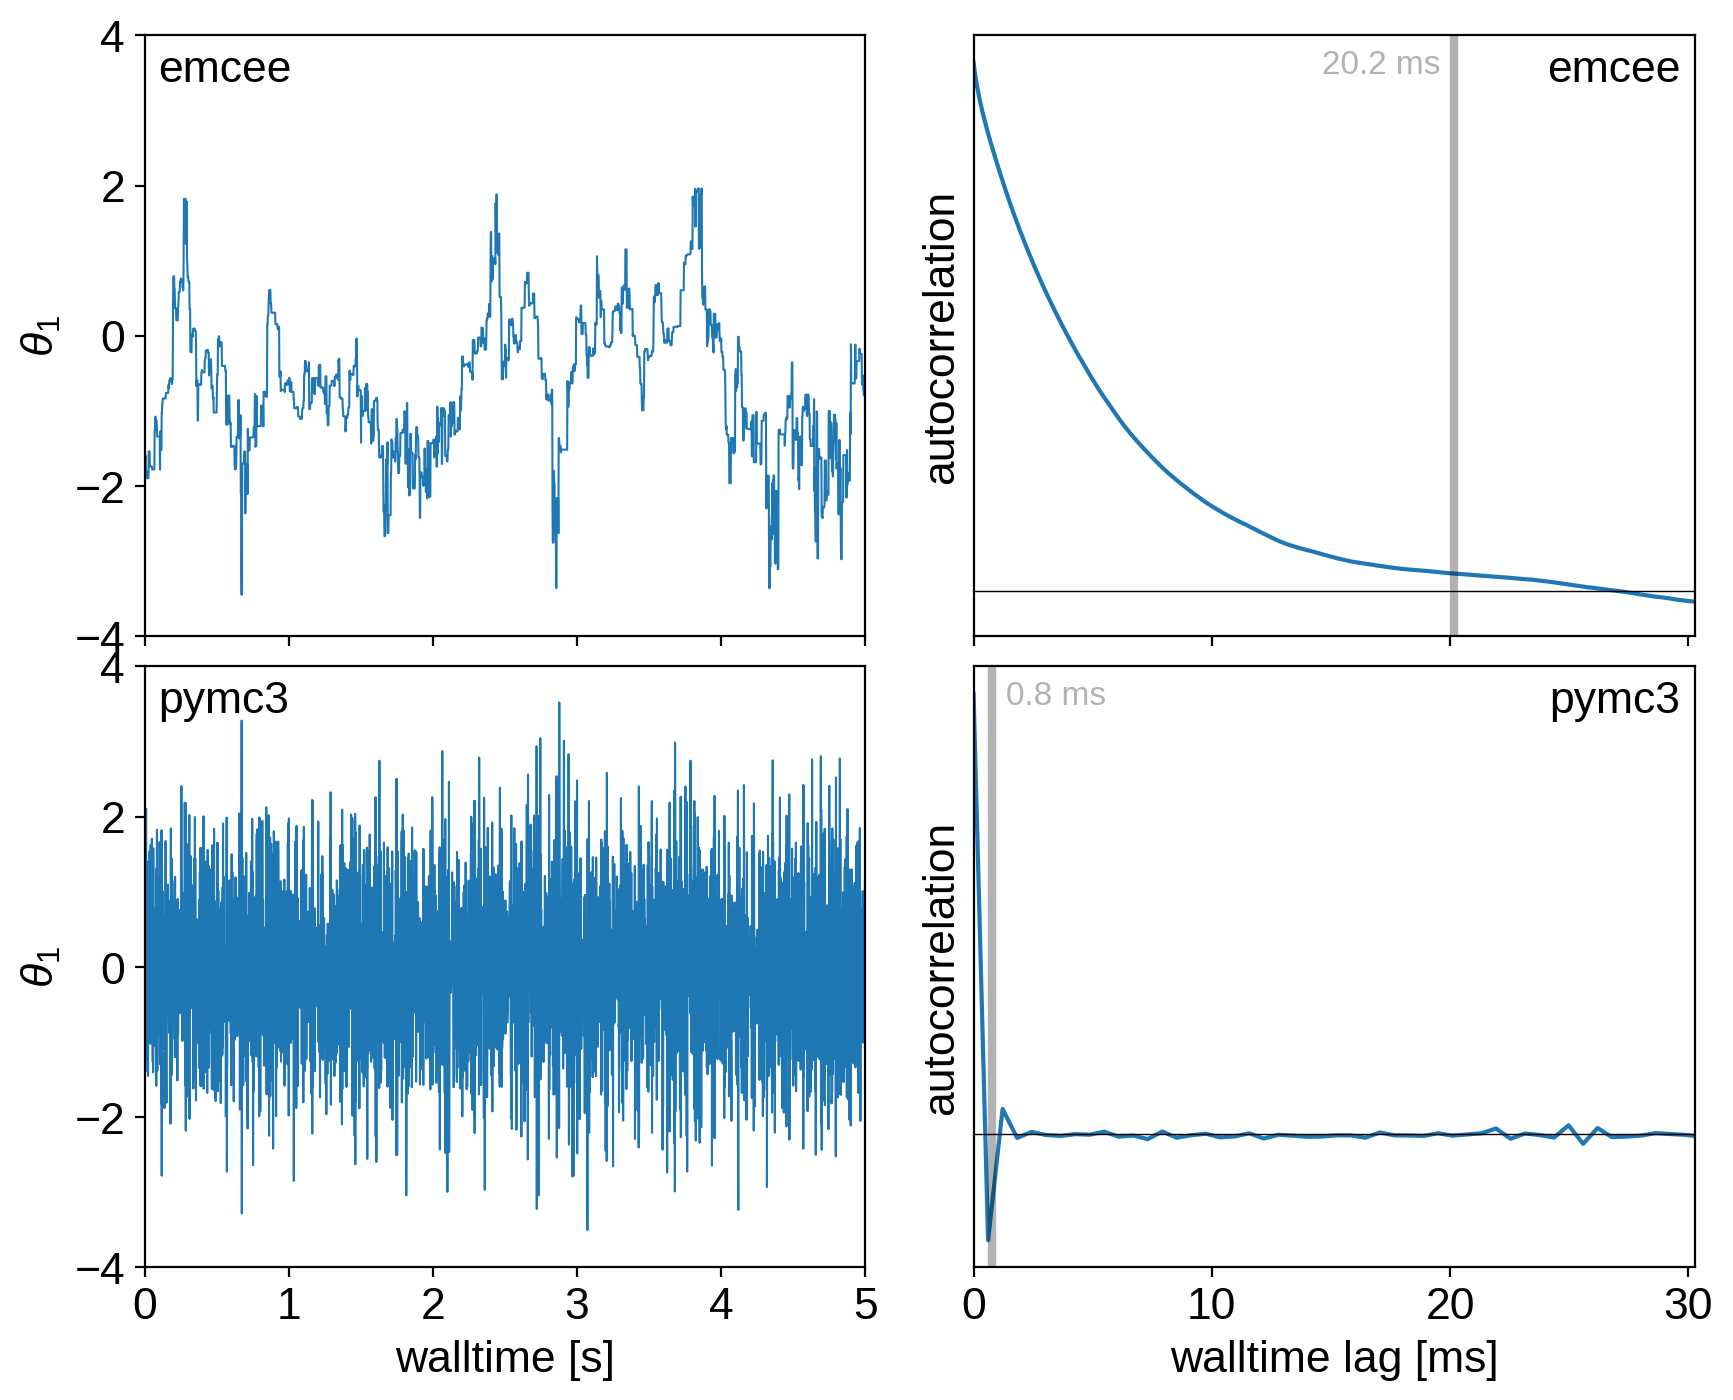

In [9]:
def get_function(x):
    n_t, n_w = x.shape
    f = np.zeros(n_t)
    for k in range(n_w):
        f += emcee.autocorr.function_1d(x[:, k])
    f /= n_w
    return f

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
t_emcee = np.linspace(0, time_emcee, samples_emcee.shape[0])
m = t_emcee < 5
ax.plot(t_emcee[m], samples_emcee[m, 5, 0], lw=0.75)
ax.annotate("emcee", xy=(0, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=16,
            xytext=(5, -5), textcoords="offset points")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)
ax.set_xticklabels([])

ax = axes[1, 0]
t_pymc3 = np.linspace(0, time_pymc3, samples_pymc3.shape[0])
m = t_pymc3 < 5
ax.plot(t_pymc3[m], samples_pymc3[m, 0, 0], lw=0.75)
ax.annotate("pymc3", xy=(0, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=16,
            xytext=(5, -5), textcoords="offset points")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlabel("walltime [s]")
ax.set_xlim(0, 5)
ax.set_ylim(-4, 4)

ax = axes[0, 1]
f_emcee = get_function(samples_emcee[:, :, 0])
scale = 1e3*time_emcee / np.prod(samples_emcee.shape[:2])
ax.plot(scale * np.arange(len(f_emcee)), f_emcee)
ax.axhline(0, color="k", lw=0.5)
ax.annotate("emcee", xy=(1, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=16,
            xytext=(-5, -5), textcoords="offset points")
val = 2*scale*tau_emcee[0]
max_x = 1.5*val
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate("{0:.1f} ms".format(val), xy=(val/max_x, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=12, alpha=0.3,
            xytext=(-5, -5), textcoords="offset points")
ax.set_xlim(0, max_x)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_ylabel("autocorrelation")

ax = axes[1, 1]
f_pymc3 = get_function(samples_pymc3[:, :, 0])
scale = 1e3*time_pymc3 / np.prod(samples_pymc3.shape[:2])
ax.plot(scale * np.arange(len(f_pymc3)), f_pymc3)
ax.axhline(0, color="k", lw=0.5)
ax.annotate("pymc3", xy=(1, 1), xycoords="axes fraction",
            ha="right", va="top", fontsize=16,
            xytext=(-5, -5), textcoords="offset points")
val = 2*scale*tau_pymc3[0]
ax.axvline(val, color="k", lw=3, alpha=0.3)
ax.annotate("{0:.1f} ms".format(val), xy=(val/max_x, 1), xycoords="axes fraction",
            ha="left", va="top", fontsize=12, alpha=0.3,
            xytext=(5, -5), textcoords="offset points")
ax.set_xlim(0, max_x)
ax.set_yticks([])
ax.set_xlabel("walltime lag [ms]")
ax.set_ylabel("autocorrelation")

fig.subplots_adjust(hspace=0.05, wspace=0.15)
fig.savefig("gaussians.pdf", bbox_inches="tight");